# Project: TMDb Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> - In this project we will investigate a movie database containing several details about some thousand movies.
One of the main ideas about what questions to make to this dataset is about the relationship that some features of a movie have in the income that it produces and therefore its success.
With this idea in mind let's wrangle de dataset and let's find some hints about what makes a movie successful.

> - The first step will be to define a way to measure the success, in terms of money we need to see the relationship between budget and the revenue. And see if more budget implies more revenues.
> - In second place we will analyze if a well voted movie and one with high popularity is also a successful one in terms of money.
> - Finnally once we identified a good measure of success, we will see if the director experience has a strong impact in the success of a movie.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In first place, let's import the dataset and explore it to see what can we do to improve the quality of the data.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Looking at the columns, there are some details that will not add much value to our analysis. So the first thing that we will do is to drop some colums and keep only those that might be interesting for our investigation.
After that we will see what to do with the null values in order to have a clean data base.

### Data Cleaning
> - In order to make a general analysis we will not keep the movies id and their titles, so we drop the columns 'id', 'imdb_id' and 'original_title'.
> - The data containing long strings of non numerical information wil also be droped in order to be able to classify the data. So the columns 'homepage', 'tagline', 'overview', 'keywords', 'cast', 'genres' and 'production_companies' are dropped.
> - Finally the columns 'budget' and 'revenues' are dimissed in order to keep their adjusted version, so the data is comparable to one another.

In [6]:
non_used_columns = ['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'overview', 'keywords', 'budget', 'revenue', 'cast', 'genres', 'release_year', 'production_companies']
df.drop(non_used_columns, axis=1, inplace=True)
df.head()

,popularity,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,124,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,George Miller,120,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,119,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,136,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,James Wan,137,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


In [7]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10866 non-null float64
director        10822 non-null object
runtime         10866 non-null int64
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 679.2+ KB


> There are two columns having null values. Since they are string values and we can not fill them with average or other values, we will drop them.

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10822 non-null float64
director        10822 non-null object
runtime         10822 non-null int64
release_date    10822 non-null object
vote_count      10822 non-null int64
vote_average    10822 non-null float64
budget_adj      10822 non-null float64
revenue_adj     10822 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 760.9+ KB


Let's check now for duplicated values and drop them if they exist.

In [9]:
sum(df.duplicated())

1

In [10]:
df.drop_duplicates(inplace=True)

Now we have a clean dataset we will explore it to start answering our questions.

<a id='eda'></a>
## Exploratory Data Analysis


### Are the success variables related to each other?

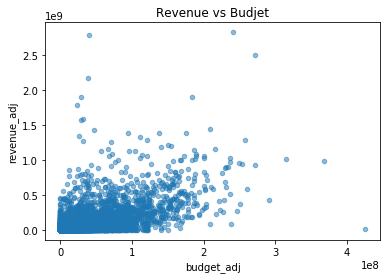

In [11]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', alpha=0.5)
plt.title('Revenue vs Budjet');

Looking at the scatter plot we can see that more budget doesn't necessarily mean more revenue. So, in order to normalize it, let's create a new column called profitability that contains the difference between the revenue and the budget divided by the budget.

In [12]:
df['profitability'] = (df['revenue_adj'] - df['budget_adj']) / df['budget_adj']
df.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profitability
count,10821.000000,10821.000000,10821.000000,10821.000000,1.082100e+04,1.082100e+04,6160.000000
mean,0.648530,102.130302,218.211810,5.971509,1.762011e+07,5.157685e+07,inf
std,1.001704,30.872755,576.672383,0.933671,3.435943e+07,1.448953e+08,NaN
min,0.000188,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00,-1.000000
25%,0.209036,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00,-0.858989
50%,0.385121,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00,0.898572
75%,0.716336,111.000000,146.000000,6.600000,2.099042e+07,3.398486e+07,5.808985
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09,inf


To perform this correctly we will only consider the rows where the profitability is non zero.
This will reduce the dataset considerably but will help us to have a good idea of the relationships that we can find.

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 10865
Data columns (total 9 columns):
popularity       5165 non-null float64
director         5165 non-null object
runtime          5165 non-null int64
release_date     5165 non-null object
vote_count       5165 non-null int64
vote_average     5165 non-null float64
budget_adj       5165 non-null float64
revenue_adj      5165 non-null float64
profitability    5165 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 403.5+ KB


,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profitability
count,5165.000000,5165.000000,5165.000000,5165.000000,5.165000e+03,5.165000e+03,5.165000e+03
mean,0.993058,107.094676,408.951985,6.031965,3.691525e+07,1.022723e+08,2.213908e+02
std,1.329566,22.798331,788.545749,0.884256,4.196663e+07,1.959757e+08,1.420345e+04
min,0.001117,0.000000,10.000000,1.500000,9.210911e-01,0.000000e+00,-1.000000e+00
25%,0.348842,93.000000,36.000000,5.500000,8.108664e+06,0.000000e+00,-1.000000e+00
50%,0.625020,103.000000,122.000000,6.100000,2.274082e+07,2.877829e+07,2.045795e-01
75%,1.152937,117.000000,402.000000,6.600000,5.008384e+07,1.134483e+08,2.258167e+00
max,32.985763,540.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09,1.018618e+06


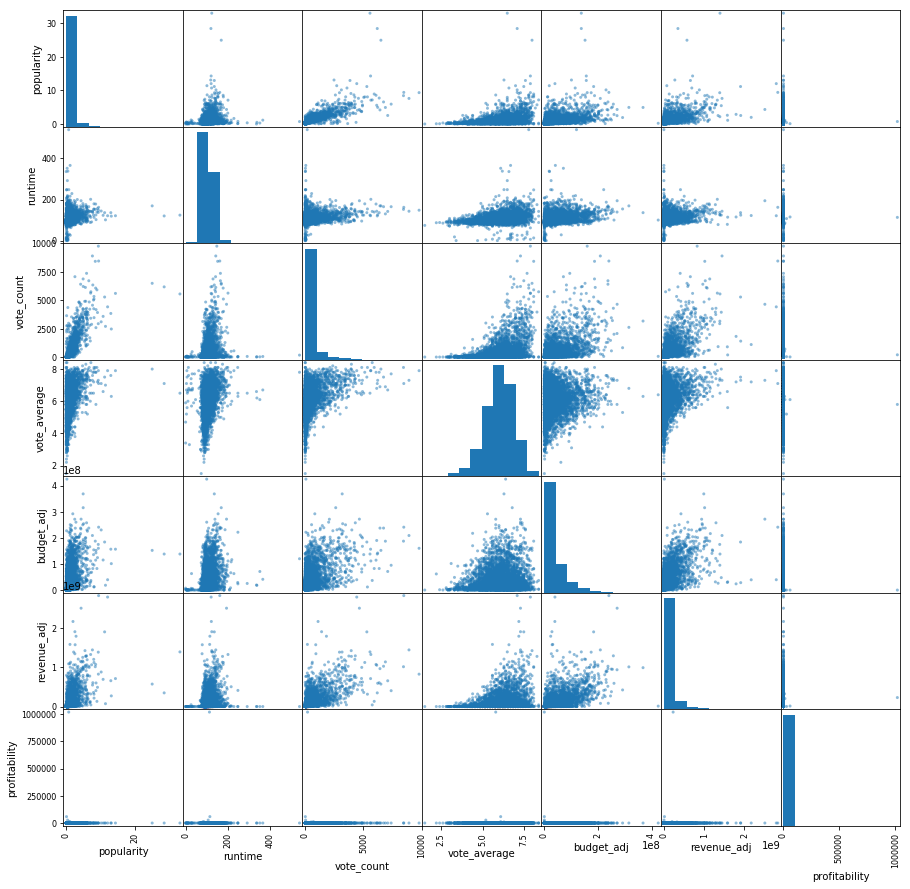

In [14]:
pd.plotting.scatter_matrix(df,  figsize=(15,15));

Looking at the graphics we can see that profitability and popularity have some outliers that don't allow us to see the real behaviour of data. Let's plot filtered values in order to have a better visualization of the data behaviour. 

In [ ]:
pd.plotting.scatter_matrix(df.query('profitability < 10 and popularity < 10'),  figsize=(15,15));

We can see that profitability and vote_average have some correlation, not very strong but the graphics show a tendency. In the other hand, popularity seems to be quite independent of the profitability. Let's go further with this variables (profitability, popularity and vote_average) to confirm our suppositions.

In [ ]:
filtered_df = df.query('profitability < 10 and popularity < 15')
filtered_df.plot(x='vote_average', y='profitability', kind='scatter', alpha=0.5, figsize=(15,10))
plt.title('Profitability versus vote_average');

In [ ]:
filtered_df.plot(x='profitability', y='popularity', kind='scatter', alpha=0.5, figsize=(15,10))
plt.title('Popularity versus profitability');

In [ ]:
filtered_df.profitability.hist(alpha=0.5)
filtered_df.vote_average.hist(alpha=0.5)
filtered_df.popularity.hist(alpha=0.5)
plt.legend(['profitability', 'vote_average', 'popularity'])
plt.title('Distribution of the success indicators')
plt.xlabel('profitability, vote_average and popularity')
plt.ylabel('Number of movies');

We can see here that popularity and profitability have a similar behaviour, and even more, considering that only profitability can be negative and the minimum value for popularity is 0.
In the other hand, vote_average seems to have a different behaviour but let's see.
Lets group the data by popularity and let see how the average profitability and popularity change in each group.

In [ ]:
filtered_df.groupby('vote_average').mean()['profitability'].plot()
filtered_df.groupby('vote_average').mean()['popularity'].plot()
plt.legend(['profitability', 'popularity'])
plt.title('Profitability and popularity versus vote_average')
plt.xlabel('vote_average')
plt.ylabel('profitability and popularity');

In [ ]:
minProf = min(filtered_df["profitability"])
maxProf = max(filtered_df["profitability"])
profitability = filtered_df["profitability"]
groups = pd.cut(profitability, np.arange(minProf, maxProf, 1))
filtered_df.groupby(groups).mean()['popularity'].plot()
filtered_df.groupby(groups).mean()['vote_average'].plot()
plt.legend(['popularity', 'vote_average'])
plt.title('Popularity and vote_average versus profitability')
plt.ylabel('popularity and vote_average');

In [ ]:
minPop = min(filtered_df["popularity"])
maxPop = max(filtered_df["popularity"])
popularity = filtered_df["popularity"]
groups = pd.cut(popularity, np.arange(minPop, maxPop, 1))
filtered_df.groupby(groups).mean()['profitability'].plot()
filtered_df.groupby(groups).mean()['vote_average'].plot()
plt.legend(['profitability', 'vote_average'])
plt.title('Profitability and vote_average versus popularity')
plt.ylabel('profitability and vote_average');

We have made some graphics showing grouped data and plotting average per group. This show some tendencies that are not necessarily causal relationships but as a conclusion we can say that a well voted movie would probably be also a popular one and also would be probably a profitable one in terms of money.
This will not be true in every case, but we could say that a successful movie should be popular, well voted and produce good profitability.

### Research Question 2  (Replace this header name!)

> Now we are interested in the influence that the experience of a director can have in the success of the movie. So lets group the data by director and let's see the mean of the three variables that we consider as success indicators compared with the amount of movies they have made.

First, we create a table called directors to store the directors, their average success indicators and the quantity of movies they've made.

In [ ]:
unused_columns = ['runtime', 'vote_count', 'budget_adj', 'revenue_adj']
directors = df.groupby('director').mean()
directors.drop(unused_columns, axis=1, inplace=True)
directors['count'] = df.groupby('director').count()['popularity']
directors.head()

In [ ]:
groupedDirectors = directors.groupby('count')['vote_average'].mean().plot()
groupedDirectors = directors.groupby('count')['profitability'].mean().plot()
groupedDirectors = directors.groupby('count')['popularity'].mean().plot()
plt.legend()
plt.title('Mean success indicators versus number of movies per director')
plt.ylabel('Success Indicators')
plt.xlabel('Number of movies per director');


The presence of outliers affect the visualisation of the data, so, lets filter it up until the quantile 95.

In [ ]:
q = directors['profitability'].quantile(0.95)
directors = directors[directors['profitability'] < q]
groupedDirectors = directors.groupby('count')['vote_average'].mean().plot()
groupedDirectors = directors.groupby('count')['profitability'].mean().plot()
groupedDirectors = directors.groupby('count')['popularity'].mean().plot()
plt.legend()
plt.title('Mean success indicators versus number of movies per director')
plt.ylabel('Success Indicators')
plt.xlabel('Number of movies per director');

Here we can already see a comparission among the three success indicators, where the directors with only few movies have a very low profitability. 
We can also see a tendency in the three lines, noticing that the highest profitabilities values appear in the groups of directors with more than 10 movies. Which might mean that experience is important when trying to make a successful movie yet it is not everything.

In order to see the tendency in the three curves, let's group the directors by count, but creating ranges of values.

In [ ]:
count = directors["count"]
groups = pd.cut(count, np.arange(0, 31, 3))
groupedDirectors = directors.groupby(groups)['vote_average'].mean().plot()
groupedDirectors = directors.groupby(groups)['profitability'].mean().plot()
groupedDirectors = directors.groupby(groups)['popularity'].mean().plot()
ticksPositions = [0,1,2,3,4,5,6,7,8]
intervals = ['1-3','4-6','7-9','10-12','13-15','16-18','19-21','22-24','25-27']
plt.xticks(ticksPositions,intervals)
plt.legend()
plt.title('Mean success indicators versus number of movies per director')
plt.ylabel('Success Indicators')
plt.xlabel('Number of movies per director');

We can see now a tendency to a slightly higher success in movies directed by people with more experience.
We can also see that this tendency is stronger in for the first 10 movies of experience.


<a id='conclusions'></a>
## Conclusions


__Conclusions from the analysis__

1- There are some tendencies that could make us think that a popular movie and a well voted one is also one with a good level of profitability.
2- This is not true for every movie and we might see cases with any combination of those three variables.
3- The relationship among the three success variables might be because all those indicators depend directly or not in the people behaviour.
4- Directors with one or two movies in their experience, have in average lower values in the success indicators than those with 10 or more movies.
5- The movies with the highest profitability values are made by directors with more than 10 movies.
6- Experience is an important factor in the success of a movie, but as everyone, is not the only necessary thing and there are always exceptions.

__Limitations found in the dataset__

1- In the variables asociated with money there are too many 0 values, and it is not clear if it means that some movies really produced 0 revenues or the data is just missing. In this case, considering the high variability of the data, the rows missing those values were dropped and it might produce unintentional bias in the analysis.
2- Some outliers in the revenues values are way too far from the mormal values, it might be an error in the data but it also might be an incredibly successfull movie. Those values were also excluded to do some comparissions.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])